In [18]:
import numpy as np
import matplotlib.pyplot as plt

# What will we learn?
* How to **scrape** content form any URL using **BeautifulSoup (bs4)**
* Implement **Word2Vec** using **gensim** library
* What is **t-SNE** and how is it different form other algorithms
* **Visualize** the embedings using **Plotly**

###  Hold on..
Before diving into learning the practical implementation, let us first strengthen the theoritical concepts.
* [Theory](#theory)
    1. [BeautifulSoup](#theory)
    2. [Word2Vec](#w2v)
    3. [t-SNE](#tsne)

Well, incase you want to skip to practical, here you go!
* [Practical Implementation](#prac)
    1. [Content 1:](#prac) Scraped - clean - embed - visualize
    2. [Content 2:](#c2) Embed - visualize - experiment

## 1. Word2Vec

Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand.

Word2vec’s applications extend beyond parsing sentences in the wild. It can be applied just as well to genes, code, likes, playlists, social media graphs and other verbal or symbolic series in which patterns may be discerned.

Why? Because words are simply discrete states like the other data mentioned above, and we are simply looking for the transitional probabilities between those states: the likelihood that they will co-occur. 

The purpose and usefulness of Word2vec is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. Word2vec creates vectors that are distributed numerical representations of word features, features such as the context of individual words. It does so without human intervention.

Given enough data, usage and contexts, Word2vec can make highly accurate guesses about a word’s meaning based on past appearances. Those guesses can be used to establish a word’s association with other words (e.g. “man” is to “boy” what “woman” is to “girl”), or cluster documents and classify them by topic. Those clusters can form the basis of search, sentiment analysis and recommendations in such diverse fields as scientific research, legal discovery, e-commerce and customer relationship management.

The output of the Word2vec neural net is a vocabulary in which each item has a vector attached to it, which can be fed into a deep-learning net or simply queried to detect relationships between words.

[To know more on Word2Vec, click me :)](https://medium.com/@zafaralibagh6/a-simple-word2vec-tutorial-61e64e38a6a1)
<a id="tsne"></a>
## 3. t-SNE

I have been comparing dimensionality reduction techniques like PCA and FLDA in [my notebook](https://www.kaggle.com/code/aneridalwadi/pca-fisher-s-lda).
One of those algorithms is called t-SNE. 

You might ask “Why I should even care? I know PCA already!”, and that would be a great question. t-SNE is something called nonlinear dimensionality reduction. What that means is this algorithm allows us to separate data that cannot be separated by any straight line, let me show you an example:

<img src="https://user-images.githubusercontent.com/57945364/172662382-88820672-0d2c-477b-819a-ad7394f28b50.png" width="55%">

**What is exactly t-SNE?**

t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data based on the similarity of data points with features, the similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbour. 
It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in 2 or 3 dimensional space. 

The nearest neighbor accuracy gives the probability that a random point has the same species as its closest neighbor. This would be close to 100% if the points were perfectly grouped according to their species. A high nearest neighbor accuracy implies that the data can be cleanly separated into groups.

**Any parameters?**

There are many, but here we will be understanding and implementing an arguably important parameter of t-SNE: **perplexity**

Perplexity is perhaps the most important parameter in t-SNE and can reveal different aspects of the data. Considered loosely, it can be thought of as the balance between preserving the global and the local structure of the data. A more direct way to think about perplexity is that it is the continuous analogy to the KNN (K-Nearest Neighbors) for which we will preserve distances.

In most implementations, perplexity defaults to 30. This focuses the attention of t-SNE on preserving the distances to its 30 nearest neighbors and puts virtually no weight on preserving distances to the remaining points. For data sets with a small number of points e.g. 100, this will uncover the global structure quite well since each point will preserve distances to a third of the data set.

For larger data sets, e.g. 10,000 points, considering 30 nearest neighbors will likely do a poor job of preserving global structure. Using a higher perplexity value e.g. 500, will do a much better job for of uncovering the global structure. For larger data sets still e.g. 500k or 1 million samples, this is typically not enough and can take quite a long time to run. Luckily, various tricks can be used to improve global structure

[To know more on T-SNE, click me :)](https://www.youtube.com/watch?v=NEaUSP4YerM)

<a id="prac"></a>
# **Practical implementation**
## 1. Scraped - clean - embed - visualize

Imports

In [19]:
import re
import nltk
import bs4 as bs
import numpy as np
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from gensim.models import word2vec

import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

Scrape the data

In [20]:
# Corpus
def read_sentences_from_file(file_path):
    corpus = []
    with open(file_path, 'r') as file:
        for line in file:
            # Assuming each line contains one sentence
            sentence = line.strip()
            if sentence:  # Check if the line is not empty
                corpus.append(sentence)
    return corpus
corpus = read_sentences_from_file("corpus.txt")

len(corpus)

90

Text cleaning

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# Convert the data to uniform case
processed_article = ' '.join(corpus).lower()
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [23]:
all_words

[['alice',
  'sings',
  'sweetly',
  'bob',
  'laughs',
  'loudly',
  'alice',
  'reads',
  'books',
  'bob',
  'drinks',
  'water',
  'alice',
  'draws',
  'flowers',
  'bob',
  'plays',
  'ball',
  'alice',
  'hugs',
  'trees',
  'bob',
  'climbs',
  'trees',
  'alice',
  'sees',
  'birds',
  'bob',
  'hears',
  'music',
  'alice',
  'smells',
  'roses',
  'bob',
  'tastes',
  'pizza',
  'alice',
  'touches',
  'clouds',
  'bob',
  'builds',
  'sandcastles',
  'alice',
  'swims',
  'gracefully',
  'bob',
  'cycles',
  'quickly',
  'alice',
  'paints',
  'pictures',
  'bob',
  'cooks',
  'eggs',
  'alice',
  'bakes',
  'cookies',
  'bob',
  'watches',
  'movies',
  'alice',
  'skips',
  'rocks',
  'bob',
  'catches',
  'fish',
  'alice',
  'explores',
  'caves',
  'bob',
  'sails',
  'boats',
  'alice',
  'plants',
  'seeds',
  'bob',
  'splashes',
  'water',
  'alice',
  'climbs',
  'mountains',
  'bob',
  'explores',
  'forests',
  'alice',
  'picnics',
  'outside',
  'bob',
  'camp

Declare model for word2vec

To train your own model you can visite this [site](https://radimrehurek.com/gensim/models/word2vec.html)

In [24]:
model = word2vec.Word2Vec(all_words, min_count=3, workers=4)

In [25]:
# we use wv to get the vector ouput for a given word
demo_wv_vector = model.wv["alice"]
demo_wv_vector 

array([-9.6817380e-03,  4.3765232e-03,  5.6539555e-03,  6.4906594e-03,
        8.1882849e-03, -6.9052158e-03,  1.4116744e-03,  7.1995449e-03,
       -3.3277569e-03, -6.9287713e-03, -4.2312946e-05, -9.1483863e-03,
       -5.9011630e-03,  7.8300098e-03,  3.9552096e-03,  7.6017492e-03,
        7.9373298e-03,  8.3804531e-03, -4.9044355e-03, -8.8049559e-04,
        2.6734883e-03, -4.9636476e-03,  9.5803430e-03, -1.0701999e-02,
        7.5428742e-03,  3.0075188e-03, -5.0071534e-03,  5.2676913e-03,
       -2.2830584e-03,  7.3212711e-03,  1.0802426e-02, -5.1195920e-03,
       -7.4263627e-04, -6.6090045e-03,  4.0053562e-03,  3.1969612e-03,
        8.0752587e-03,  6.3763713e-03,  1.0186577e-02,  1.0236534e-02,
        8.2463603e-03, -7.2639040e-03, -1.0147794e-02, -4.3586764e-04,
       -3.0610235e-03,  8.8273697e-03,  6.3503259e-03, -1.5021231e-03,
        1.6096544e-03,  2.1768580e-03,  8.4286015e-03, -1.0309295e-02,
       -8.4915460e-04,  3.3160639e-03, -1.1678891e-03,  8.8376664e-03,
      

In [26]:
demo_wv_vector.shape

(100,)

Lets see how the ```t-SNE``` plots our data with varying ```min_count``` parameter in training our ```word2vec``` model

In [27]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot_with_distance(model, corpus):
    labels = []
    tokens = []
    occurrences_count = []
    w = 0
    
    # Extracting words and their vectors from our trained model 
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)
    
    # Convert tokens to a NumPy array
    tokens = np.array(tokens)
    
    # Initialize an empty list to store the coordinates of "Alice" and "Bob"
    alice_coords = []
    bob_coords = []
    
    # Count occurrences of "Alice" and "Bob" together in each row of the corpus
    for row in corpus:
        if 'Alice' in row and 'Bob' in row:
            w += 1
        occurrences_count.append(w)
    
    # Train t-SNE with a smaller perplexity value
    tsne_model = TSNE(perplexity=2, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)
    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(10, 10)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    
    # Find the indices of "Alice" and "Bob" in the labels list
    alice_index = labels.index("alice")
    bob_index = labels.index("bob")
    
    # Get the coordinates of "Alice" and "Bob"
    alice_coords = (x[alice_index], y[alice_index])
    bob_coords = (x[bob_index], y[bob_index])
    
    # Draw a line between "Alice" and "Bob"
    plt.plot([alice_coords[0], bob_coords[0]], [alice_coords[1], bob_coords[1]], color='red')
    
    # Annotate the distance w between "Alice" and "Bob"
    plt.text((alice_coords[0] + bob_coords[0]) / 2, (alice_coords[1] + bob_coords[1]) / 2, f"w={w}", ha='center', va='center')
    
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    plt.show()

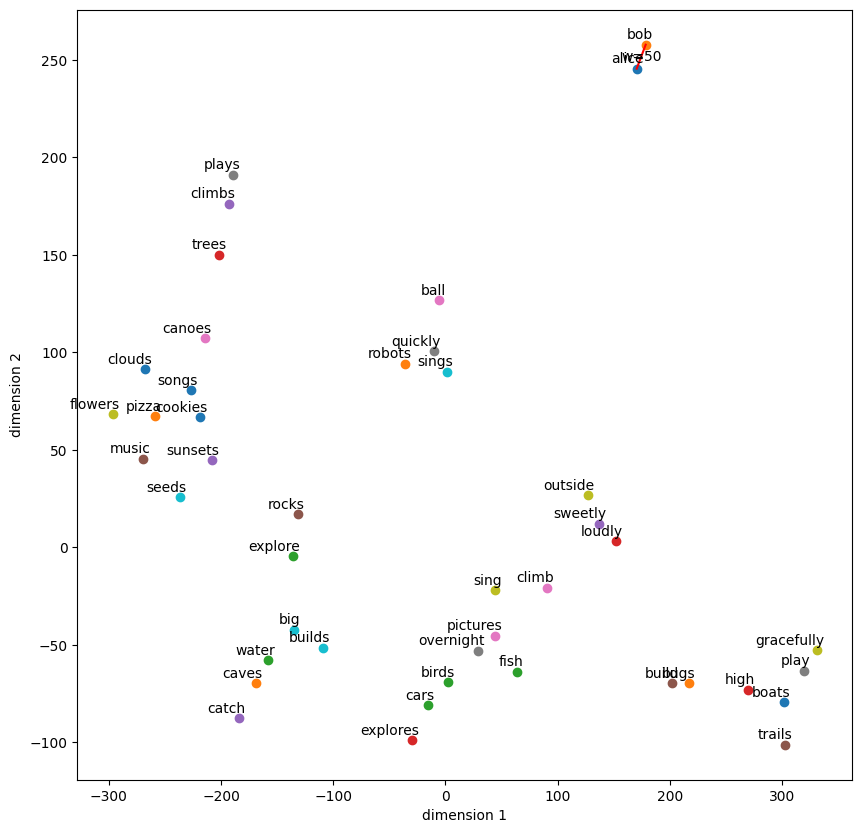

In [28]:
# Words that occur atleast 5 times
model = word2vec.Word2Vec(all_words, window=20, min_count=2, workers=4)
tsne_plot_with_distance(model, corpus)

In [29]:
# # Words that occur atleast 3 times
# model = word2vec.Word2Vec(all_words, window=20, min_count=2, workers=4)
# tsne_plot()

It gets more and more **difficult to read** as the size of dataset increases

Hence, for **semantic retention** and better inferences, we will plot only the **similar words** to a chosen key.

Word2Vector provides us with an inbuilt functionality to give the list of top similar words with respect to the cosine-distance

In [30]:
# demo output
import pandas as pd

pd.DataFrame(model.wv.most_similar('alice'))

,0,1
0,bob,0.701882
1,trails,0.474726
2,quickly,0.434307
3,ball,0.406286
4,builds,0.381963
5,songs,0.371611
6,climb,0.338818
7,pizza,0.337520
8,caves,0.336264
9,flowers,0.317932


We see that it significantly shows semantically close words like alice and bob.

For the basics, lets select 2 words and plot the similar words using t-SNE.

In [31]:
keys = ['alice', 'bob']

# this array will contain the vectors(dimension 100) and the labels
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [32]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=1, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

C:\Users\saad\AppData\Local\Temp\ipykernel_21564\477105911.py:7: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c=color, alpha=a, label=label)


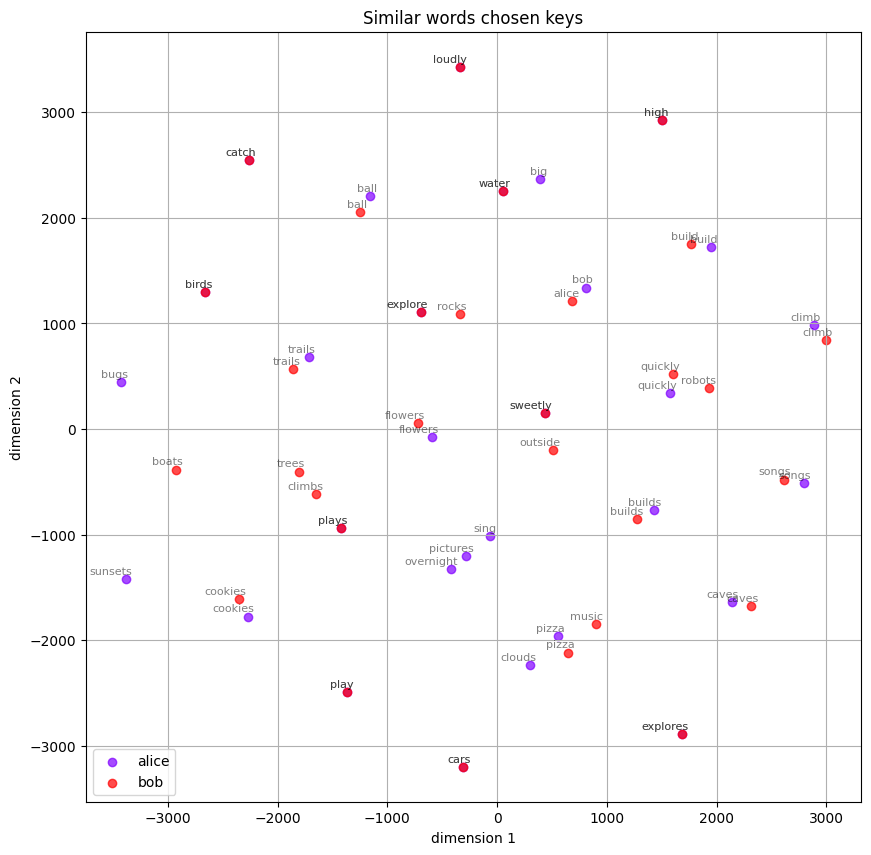

In [33]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(10, 10))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=3)
    plt.title(title)
    plt.grid(True)
    plt.xlabel("dimension 1")
    plt.ylabel("dimension 2")
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words chosen keys', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

You see how significantly t-SNE reduces the dimension form 100 to 2 with efficiently segregating the clusters!  

**Inference:**

We know that the value of perplexity denotes how many neighbors will affect a point. Consider the 1st case where we set ```P = 15``` , this focuses the attention of t-SNE on preserving the distances to its 15 nearest neighbors and puts virtually no weight on preserving distances to the remaining points. 

Since the subset we chose is smaller, we see the plots starts to uncover the global structure quite well since each point will preserve distances to a large portion of the data set.

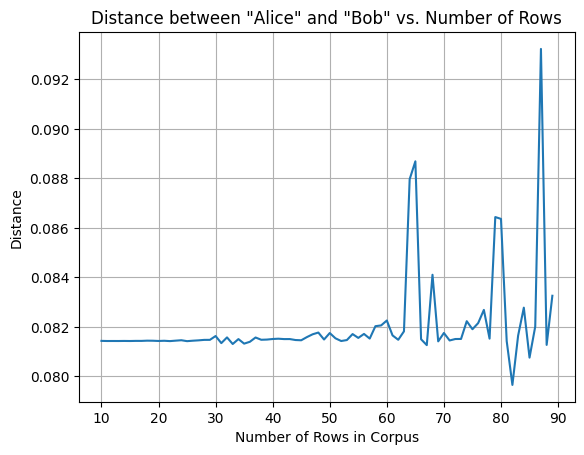

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize an empty list to store the distances
distances = []
corpus = read_sentences_from_file('corpus.txt')

# Iterate through the rows of the corpus
for i in range(10, len(corpus)):
    # Select the corresponding rows from the corpus
    selected_corpus = corpus[:i+1]

    # Convert the data to uniform case
    processed_article = ' '.join(selected_corpus).lower()
    processed_article = re.sub('[^a-zA-Z]', ' ', processed_article)
    processed_article = re.sub(r'\s+', ' ', processed_article)

    # Preparing the dataset
    all_sentences = nltk.sent_tokenize(processed_article)
    all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

    # Removing Stop Words
    for i in range(len(all_words)):
        all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

    # Initialize and train the Word2Vec model with the selected corpus
    model = word2vec.Word2Vec(all_words, window=20, min_count=2, workers=4)
    
    # Compute the embeddings for "Alice" and "Bob"
    alice_vector = model.wv["alice"]
    bob_vector = model.wv["bob"]
    
    # Calculate the Euclidean distance between "Alice" and "Bob"
    distance = np.linalg.norm(alice_vector - bob_vector)
        
    # Append the distance to the list
    distances.append(distance)

# Plot the distance as a function of the number of rows
plt.plot(range(10, len(corpus)), distances)
plt.title('Distance between "Alice" and "Bob" vs. Number of Rows')
plt.xlabel('Number of Rows in Corpus')
plt.ylabel('Distance')
plt.grid(True)
plt.show()